# __Resume Recommendtion by using NLP__



## __Contents:__
> 1. Overview
> 2. Laibraries
> 3. Read the dataset
> 4. Pre-processing
>> 1. Cleaning
>> 2. Lemmatization
>> 3. Victorizer
>> 4. Export the cleaned dataset
> 5. Topic Modeling
>> 1. LSA
>> 2. LDA
> 6. Visualization
> 7. Recommender system

---


## __Overview:__

In this project we take the dataset from kaggle [here](https://www.kaggle.com/gauravduttakiit/resume-dataset)


---

## __Laibraries:__

In [271]:
# # !pip install pyspellchecker
# # !python -m spacy download en_core_web_sm
# !pip install pyLDAvis
# !pip install wordcloud
# !python -m spacy download en_core_web_sm


In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import re
import spacy
import string
from pprint import pprint
import pickle 

import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import	TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.models import LsiModel
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis # don't skip this
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

nltk.download('popular')
nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'year','less','india','january'])



[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/RAHAF/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/RAHAF/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/RAHAF/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/RAHAF/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/RAHAF/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/RAHAF/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to

## <hr>

## __Read the Dataset:__

In [140]:
df = pd.read_csv('data/UpdatedResumeDataSet.csv', encoding='utf-8')

df.shape

(962, 2)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [142]:
df.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
Blockchain                   40
ETL Developer                40
Data Science                 40
Operations Manager           40
Sales                        40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

In [143]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [144]:
df.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
Blockchain                   40
ETL Developer                40
Data Science                 40
Operations Manager           40
Sales                        40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

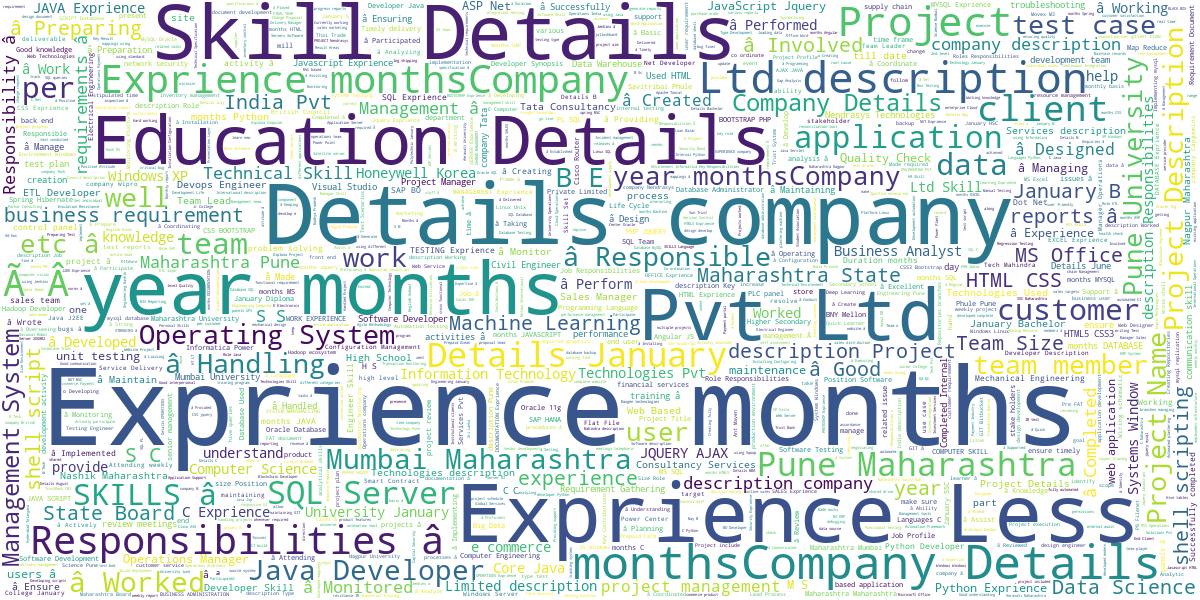

In [145]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['Resume'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, width=1200, height=600, contour_color='blues')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [146]:
# Code
group = df.groupby('Category')[['Resume']].count()
group

,Resume
Category,
Advocate,20
Arts,36
Automation Testing,26
Blockchain,40
Business Analyst,28
Civil Engineer,24
Data Science,40
Database,33
DevOps Engineer,55


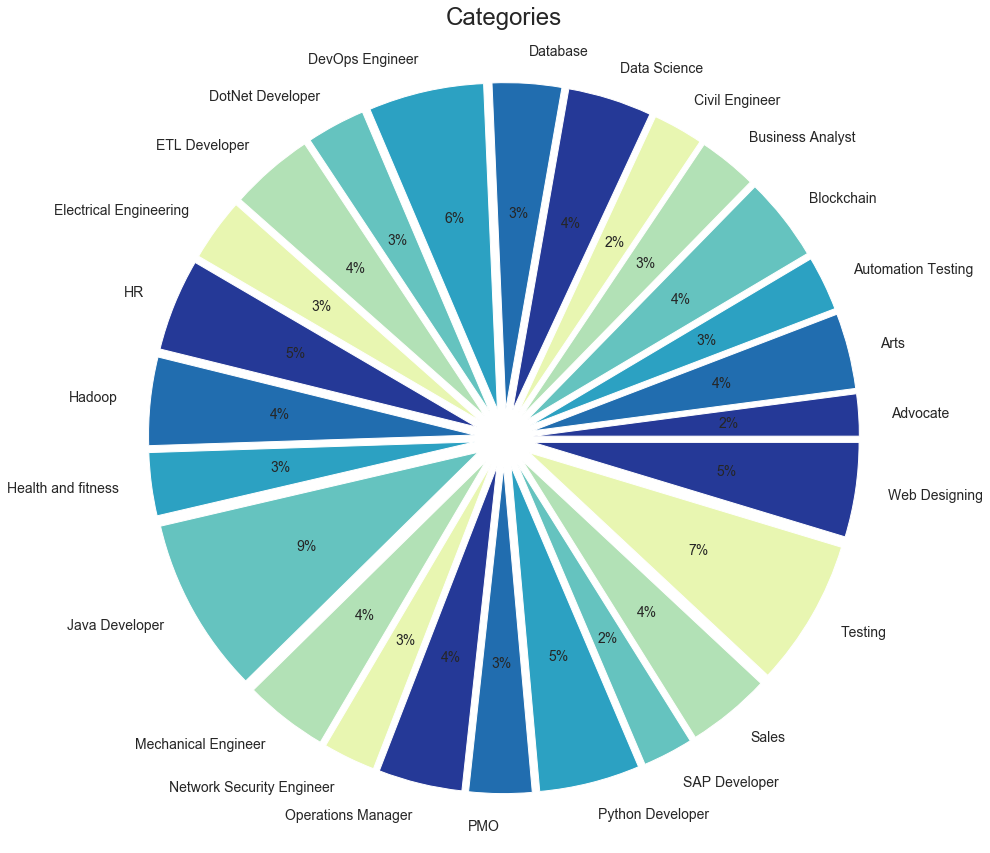

In [321]:
# Visual - pie
colors = sns.color_palette(palette='YlGnBu_r')
plt.figure(figsize = (15,15))
plt.pie(x=group["Resume"], labels =group.index, autopct='%.0f%%',colors=colors, textprops={'fontsize': 14} ,explode=[0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09]);
plt.title('Categories', size=24);
plt.show()

## <hr>

## __Pre-processing:__

### __Cleaning:__

In [148]:
# remove punc/ numbers/ stopwords

wpt = nltk.WordPunctTokenizer()
lemmatizer = nltk.WordNetLemmatizer()

def normalize_document(resumeText):
    resumeText = resumeText.lower() # lowercase
    resumeText = re.sub('\w*\d\w*', ' ', resumeText) # remove digits
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape(string.punctuation), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    
    # tokeanize document
    tokens = wpt.tokenize(resumeText)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # big_text = [bigram_mod[doc] for doc in texts]
    # tri_text = [trigram_mod[bigram_mod[doc]] for doc in texts]

    # Lemmatise document from filtered tokens
    lem_text = [lemmatizer.lemmatize(i) for i in filtered_tokens]
    # re-create document from filtered tokens
    resumeText = ' '.join(lem_text)
    return resumeText

In [149]:
normalize_corpus = np.vectorize(normalize_document)
corpus = df['Resume']
norm_corpus = normalize_corpus(corpus)

## <hr>

## __Topic Modeling:__

- Prepare data

In [198]:
%%time
#Tokenise the corpus

tokenized_corp = [word_tokenize(i) for i in norm_corpus]

# Create Dictionary

id2word = corpora.Dictionary(tokenized_corp)

#Remove words that don't feature 20 times and those that feature in over 50% of documents

id2word.filter_extremes(no_below=20, no_above=0.5)

texts = tokenized_corp

# Term Document Frequency

corpus = [id2word.doc2bow(text) for text in texts]


CPU times: user 2.6 s, sys: 103 ms, total: 2.7 s
Wall time: 3.5 s


### __LSA:__

#### __Fitting:__

In [151]:
%%time

lsa_model =LsiModel(corpus=corpus, id2word=id2word, num_topics=25)


CPU times: user 256 ms, sys: 62 ms, total: 318 ms
Wall time: 363 ms


#### __Performance Metrics:__

In [152]:
# Compute Coherence Score
'''  The higher , the better. '''

coherence_lsa_model = CoherenceModel(model=lsa_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lsa = coherence_lsa_model.get_coherence()
print('\nCoherence Score: ', coherence_lsa)


Coherence Score:  0.35854583323513595


### __LDA:__

#### __Fitting:__

In [258]:
%%time

lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                                        id2word=id2word, 
                                        num_topics=10, 
                                        random_state=123,
                                        chunksize=100,
                                        passes=500, 
                                        #number of passes was investigated. At 500 the coherence score will remain relatively similar
                                        #with any further increase. As the document is quite small this number of passes makes sense.
                                        per_word_topics=True)


CPU times: user 2min 59s, sys: 18.5 s, total: 3min 17s
Wall time: 4min 10s


#### __Assign Dominant topic for each document:__

In [259]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=norm_corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=norm_corpus)

# Format
df_topic_key = df_topic_sents_keywords.reset_index()
df_topic_key.columns = ['Document_No', 'Topic','Keywords', 'Resume']
df_topic_key.head()

,Document_No,Topic,Keywords,Resume
0,0,6.0,"data, using, hadoop, developer, sap, sql, busi...",skill programming language python panda numpy ...
1,1,6.0,"data, using, hadoop, developer, sap, sql, busi...",education detail may may b e uit rgpv data sci...
2,2,2.0,"electrical, engineering, check, python, test, ...",area interest deep learning control system des...
3,3,6.0,"data, using, hadoop, developer, sap, sql, busi...",skill r python sap hana tableau sap hana sql s...
4,4,6.0,"data, using, hadoop, developer, sap, sql, busi...",education detail mca ymcaust faridabad haryana...


#### __Performance Metrics:__

In [260]:
# Compute Perplexity
''' a measure of how good the model is. lower the better. '''

print('\nPerplexity: ', lda_model.log_perplexity(corpus))  


Perplexity:  -6.236282816447045


In [261]:
# Compute Coherence Score
'''  The higher , the better. '''

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4486711170261698


#### __Exploration of LDA topics:__

In [262]:
# # Print the Keyword in the 25 topics

for i,topic in lda_model.show_topics(formatted=True, num_topics=10, num_words=10):
    print(str(i)+": "+ topic)
    print()

0: 0.040*"java" + 0.031*"developer" + 0.022*"web" + 0.020*"database" + 0.019*"window" + 0.017*"c" + 0.016*"sql" + 0.015*"html" + 0.014*"mysql" + 0.014*"used"

1: 0.018*"business" + 0.017*"report" + 0.015*"service" + 0.012*"process" + 0.010*"operation" + 0.010*"client" + 0.009*"customer" + 0.009*"requirement" + 0.009*"issue" + 0.008*"work"

2: 0.021*"electrical" + 0.019*"engineering" + 0.018*"check" + 0.016*"python" + 0.015*"test" + 0.014*"science" + 0.014*"engineer" + 0.013*"knowledge" + 0.013*"machine" + 0.012*"learning"

3: 0.062*"test" + 0.060*"testing" + 0.018*"transformer" + 0.017*"automation" + 0.015*"quality" + 0.014*"case" + 0.012*"responsibility" + 0.011*"inspection" + 0.011*"process" + 0.010*"manual"

4: 0.022*"network" + 0.017*"security" + 0.016*"role" + 0.016*"application" + 0.014*"vendor" + 0.014*"responsibility" + 0.014*"cisco" + 0.011*"time" + 0.011*"customer" + 0.011*"firewall"

5: 0.035*"sale" + 0.027*"january" + 0.017*"fitness" + 0.016*"mumbai" + 0.015*"working" + 0.0

#### __Rename the LDA topics:__

##### __Merge the new with old dataframe:__

In [209]:
df['Document_No'] = list(range (0,df.shape[0]) )

In [210]:
df.rename(columns={'Resume':'org_Resume'},inplace=True)

In [213]:
merged = df.merge(df_topic_key,on='Document_No')
merged.tail()

,Category,org_Resume,Document_No,Topic,Keywords,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...,957,2.0,"electrical, check, engineering, test, python, ...",computer skill proficient m office word basic ...
958,Testing,â Willingness to accept the challenges. â ...,958,3.0,"testing, test, transformer, quality, automatio...",willingness ept challenge positive thinking go...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",959,3.0,"testing, test, transformer, quality, automatio...",personal skill quick learner eagerness learn n...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,960,2.0,"electrical, check, engineering, test, python, ...",computer skill software knowledge m power poin...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...,961,0.0,"java, developer, web, window, database, c, sql...",skill set o window xp database mysql sql serve...


In [ ]:
# Save the dataset result
# merged.to_csv("data/df_final.csv")

##### __Rename the topics:__

In [216]:
df_final = pd.read_csv('data/df_final.csv')
df_final.head(60)

,Unnamed: 0,Category,org_Resume,Document_No,Topic,Keywords,Resume
0,0,Data Science,Skills * Programming Languages: Python (pandas...,0,4.0,"data, hadoop, hive, using, blockchain, python,...",skill programming language python panda numpy ...
1,1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,1,4.0,"data, hadoop, hive, using, blockchain, python,...",education detail may may b e uit rgpv data sci...
2,2,Data Science,"Areas of Interest Deep Learning, Control Syste...",2,4.0,"data, hadoop, hive, using, blockchain, python,...",area interest deep learning control system des...
3,3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,3,4.0,"data, hadoop, hive, using, blockchain, python,...",skill r python sap hana tableau sap hana sql s...
4,4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",4,4.0,"data, hadoop, hive, using, blockchain, python,...",education detail mca ymcaust faridabad haryana...
5,5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",5,0.0,"java, window, testing, january, application, c...",skill c basic iot python matlab data science m...
6,6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,6,4.0,"data, hadoop, hive, using, blockchain, python,...",skill python tableau data visualization r stud...
7,7,Data Science,Education Details \n B.Tech Rayat and Bahra ...,7,4.0,"data, hadoop, hive, using, blockchain, python,...",education detail b tech rayat bahra institute ...
8,8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,8,4.0,"data, hadoop, hive, using, blockchain, python,...",personal skill ability quickly grasp technical...
9,9,Data Science,Expertise â Data and Quantitative Analysis â...,9,4.0,"data, hadoop, hive, using, blockchain, python,...",expertise data quantitative analysis decision ...


In [247]:
# # Rename topics, first create dictionary
lda_dict = { 
                0: 'Back-end Developer',
                1: 'Sales',
                2: 'IT Specialist',
                3: 'Testing',
                4: 'Data Science',
                5: 'Network Security Engineer',
                6: 'Operations Manager',
                7:'DevOps Engineer',
                8: 'Web Design',
                9: 'Project Management',
            }

df_final["Topic"] = df_final.Topic.map(lda_dict)
df_final


,Unnamed: 0,Category,org_Resume,Document_No,Topic,Keywords,Resume
0,0,Data Science,Skills * Programming Languages: Python (pandas...,0,Data Science,"data, hadoop, hive, using, blockchain, python,...",skill programming language python panda numpy ...
1,1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,1,Data Science,"data, hadoop, hive, using, blockchain, python,...",education detail may may b e uit rgpv data sci...
2,2,Data Science,"Areas of Interest Deep Learning, Control Syste...",2,Data Science,"data, hadoop, hive, using, blockchain, python,...",area interest deep learning control system des...
3,3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,3,Data Science,"data, hadoop, hive, using, blockchain, python,...",skill r python sap hana tableau sap hana sql s...
4,4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",4,Data Science,"data, hadoop, hive, using, blockchain, python,...",education detail mca ymcaust faridabad haryana...
...,...,...,...,...,...,...,...
957,957,Testing,Computer Skills: â¢ Proficient in MS office (...,957,Testing,"test, testing, transformer, quality, engineeri...",computer skill proficient m office word basic ...
958,958,Testing,â Willingness to accept the challenges. â ...,958,Testing,"test, testing, transformer, quality, engineeri...",willingness ept challenge positive thinking go...
959,959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",959,Testing,"test, testing, transformer, quality, engineeri...",personal skill quick learner eagerness learn n...
960,960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,960,Testing,"test, testing, transformer, quality, engineeri...",computer skill software knowledge m power poin...


In [248]:
# df_final.to_csv("df_final.csv")

#### __Visualization:__

In [197]:
# Visualize the topics

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)


In [ ]:
# Save the result
# pyLDAvis.save_html(vis, 'lda.html')

## <hr>

## __Visualization:__

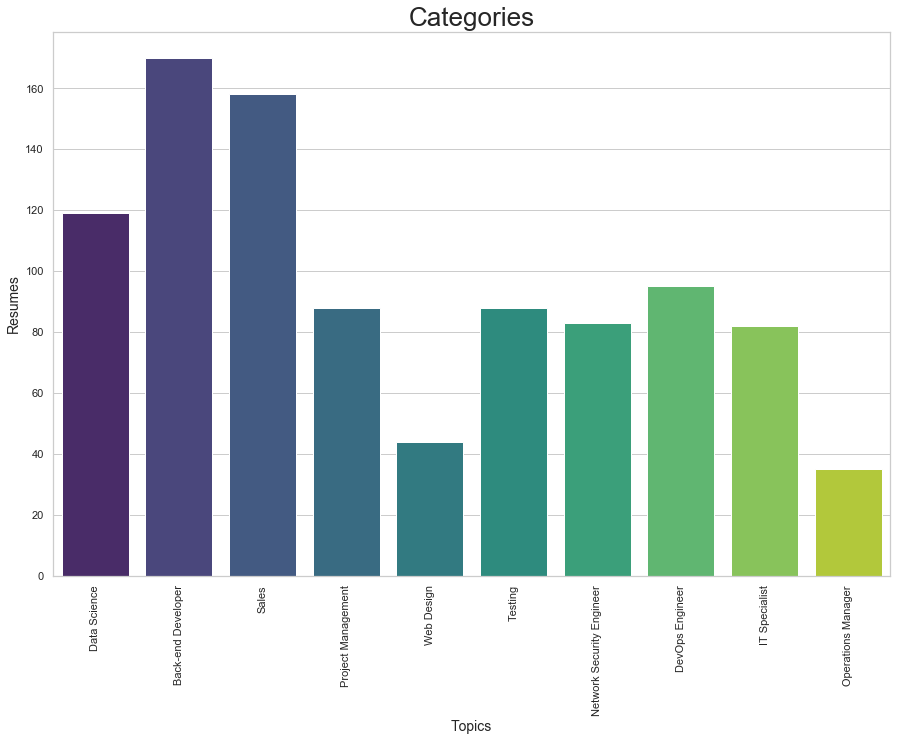

In [319]:
plt.figure(figsize = (15,10))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='Topic', palette="viridis", data=df_final);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title('Categories', size=26);
ax.set_xlabel('Topics', size=14);
ax.set_ylabel('Resumes', size=14);

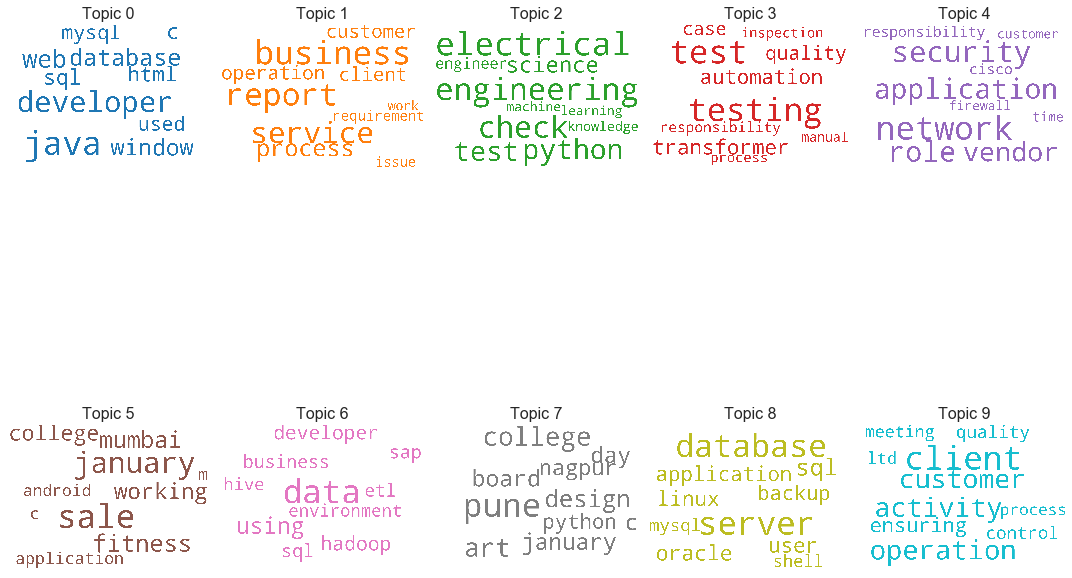

In [273]:
# 1. Wordcloud of Top N words in 9 topics
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
                  
topics = lda_model.show_topics(formatted=False, num_topics=10)

fig, axes = plt.subplots(2, 5, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=400)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## <hr>

## __Recommender system:__

In [324]:
df_final

,Unnamed: 0,Category,org_Resume,Document_No,Topic,Keywords,Resume
0,0,Data Science,Skills * Programming Languages: Python (pandas...,0,Data Science,"data, hadoop, hive, using, blockchain, python,...",skill programming language python panda numpy ...
1,1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,1,Data Science,"data, hadoop, hive, using, blockchain, python,...",education detail may may b e uit rgpv data sci...
2,2,Data Science,"Areas of Interest Deep Learning, Control Syste...",2,Data Science,"data, hadoop, hive, using, blockchain, python,...",area interest deep learning control system des...
3,3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,3,Data Science,"data, hadoop, hive, using, blockchain, python,...",skill r python sap hana tableau sap hana sql s...
4,4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",4,Data Science,"data, hadoop, hive, using, blockchain, python,...",education detail mca ymcaust faridabad haryana...
...,...,...,...,...,...,...,...
957,957,Testing,Computer Skills: â¢ Proficient in MS office (...,957,Testing,"test, testing, transformer, quality, engineeri...",computer skill proficient m office word basic ...
958,958,Testing,â Willingness to accept the challenges. â ...,958,Testing,"test, testing, transformer, quality, engineeri...",willingness ept challenge positive thinking go...
959,959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",959,Testing,"test, testing, transformer, quality, engineeri...",personal skill quick learner eagerness learn n...
960,960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,960,Testing,"test, testing, transformer, quality, engineeri...",computer skill software knowledge m power poin...


In [325]:
metadata = df_final.loc[: ,['Document_No','Topic', 'Keywords', 'Resume']]

### __Recommend by document:__

In [277]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata['Resume'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(962, 6200)

In [279]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#Output the shape of cosine_sim
cosine_sim.shape

(962, 962)

In [280]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(docid, cosine_sim=cosine_sim):

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[docid]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    resume_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata[['Document_No','Topic', 'Keywords', 'Resume']].iloc[resume_indices]

In [281]:
# document in index 0
recommend = get_recommendations(0)
recommend.set_index('Document_No').reset_index()

,Document_No,Topic,Keywords,Resume
0,10,Data Science,"data, hadoop, hive, using, blockchain, python,...",skill programming language python panda numpy ...
1,20,Data Science,"data, hadoop, hive, using, blockchain, python,...",skill programming language python panda numpy ...
2,30,Data Science,"data, hadoop, hive, using, blockchain, python,...",skill programming language python panda numpy ...
3,9,Data Science,"data, hadoop, hive, using, blockchain, python,...",expertise data quantitative analysis decision ...
4,19,Data Science,"data, hadoop, hive, using, blockchain, python,...",expertise data quantitative analysis decision ...
5,29,Data Science,"data, hadoop, hive, using, blockchain, python,...",expertise data quantitative analysis decision ...
6,39,Data Science,"data, hadoop, hive, using, blockchain, python,...",expertise data quantitative analysis decision ...
7,7,Data Science,"data, hadoop, hive, using, blockchain, python,...",education detail b tech rayat bahra institute ...
8,17,Data Science,"data, hadoop, hive, using, blockchain, python,...",education detail b tech rayat bahra institute ...
9,27,Data Science,"data, hadoop, hive, using, blockchain, python,...",education detail b tech rayat bahra institute ...


### __Recommend by topic:__

In [340]:
# Function that takes in topic as input and outputs most similar resumes

def get_recommendations(topic):
    recommend = metadata[ metadata.Topic == topic]
    return recommend[['Topic', 'Keywords', 'Resume']].iloc[:9]

In [341]:
# By topic number

get_recommendations('Data Science')

,Topic,Keywords,Resume
0,Data Science,"data, hadoop, hive, using, blockchain, python,...",skill programming language python panda numpy ...
1,Data Science,"data, hadoop, hive, using, blockchain, python,...",education detail may may b e uit rgpv data sci...
2,Data Science,"data, hadoop, hive, using, blockchain, python,...",area interest deep learning control system des...
3,Data Science,"data, hadoop, hive, using, blockchain, python,...",skill r python sap hana tableau sap hana sql s...
4,Data Science,"data, hadoop, hive, using, blockchain, python,...",education detail mca ymcaust faridabad haryana...
6,Data Science,"data, hadoop, hive, using, blockchain, python,...",skill python tableau data visualization r stud...
7,Data Science,"data, hadoop, hive, using, blockchain, python,...",education detail b tech rayat bahra institute ...
8,Data Science,"data, hadoop, hive, using, blockchain, python,...",personal skill ability quickly grasp technical...
9,Data Science,"data, hadoop, hive, using, blockchain, python,...",expertise data quantitative analysis decision ...
